# Assignment 7

**Group 3**
Sejal Vyas(10450395)

Shiwani Deo(10454959)

Parth Parab(10444835)


Please find question 1 and 3 here

**Q1. To get an idea about how difficult it is to unambiguously identify parts-of-speech select several words:**

**1. That can be a noun, verb, adjective, and adverb**

**2. Find their high frequency senses using WordNet**

**3. Examine their definitions and example uses**

**4. Try to generate some rules for how to determine as to when they are a noun, verb, adjective, or adverb from their context.**

### 1. **Bitter**

* **Noun** - Property of having a harsh unpleasant taste. *e.g. The candy was far too sweet but the aftertaste was bitter.*
* **Verb** - Make bitter. *e.g. Herbs are employed to bitter vermouth.*
* **Adjective** - Marked by strong resentment or cynicism, causing a sharp and acrid taste experience. *e.g. I was still bitter about not being chosen to open the talent show.*
* **Adverb** - To an intense or severe degree. e.g. *It's bitter cold.*

### 2. **Clear**

* **Noun** - State of being free of suspicion, unobstructed space. *e.g. The investigation proved that he was in the clear.*
* **Verb** - Make a way or path by removing obstacles. *e.g. Clear your desk immediately.*
* **Adjective** - Free from confusion or doubt, readily apparent to the mind. *e.g. The way she reacted gave us a clear idea about her personality.*
* Adverb - In an easily perceptible manner. *e.g. We could see the cheek cells clearly under the microscope.*

### 3. **Quiet**
* **Noun** - The absence of sound. *e.g. The street was quiet, it was eerie.*
* **Verb** - Make calm or still. *e.g. Hush my child, quiet the thoughts of worry and fear.*
* **Adjective** - Near absence of agiatation or activity, not showy or obstrusive. *e.g. We mean no harm, we are quiet peace-loving people.*
* **Adverb** - With little or no activity/agitation. *e.g. The actor slipped out quietly thorugh the back door.*

### 4. **Short**
* **Noun** - As an abbreviation. *e.g. My name is Katherine, Kate for short.*
* **Verb** - Cheat someone in terms of money. *e.g. She handed me a twenty dollar bill and ran away, she shorted me by 5 dollars.*
* **Adjective** - Not tall or high, not extended in time. *e.g. We returned from our short vacation.*
* **Adverb** - At some point or degree. *e.g. I quit college a month short of graduation.*

### 5. **Wrong**

* **Noun** - The state of being mistaken or incorrect. *e.g. Your answer was wrong.*
* **Verb** - To do wrong to. *e.g. You wronged him by selling his possessions without telling him.*
* **Adjective** - Not right or proper according to a standard. *e.g. It was wrong not to thank your host.*
* **Adverb** - Unsuccessful or unfortunate way. *e.g. Something went wrong during his presentation.*


###**High Frequency senses using Wordnet**

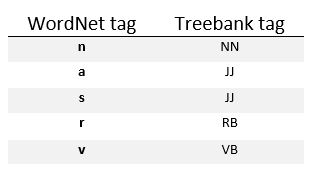

In [45]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

words = ['bitter', 'clear', 'quiet', 'short', 'wrong']
for word in words:
  synsets = wn.synsets(word)

  sense2freq = {'Noun': 0,'Verb': 0, 'Adverb':0, 'Adjective':0}
  for s in synsets:
    freq = 0  
    for lemma in s._lemmas:
      freq+=lemma.count()
    #sense2freq[s.name() +", Tag = "+s.pos()] = freq
    if(s.pos()=='a' or s.pos()=='s'):
       sense2freq['Adjective'] = sense2freq['Adjective']  + freq
    elif (s.pos()=='v'):
      sense2freq['Verb'] = sense2freq['Verb']  + freq
    elif (s.pos()=='r'):
      sense2freq['Adverb'] = sense2freq['Adverb']  + freq
    else:
      sense2freq['Noun'] = sense2freq['Noun']  + freq

  print("For the word:", word)
  for s in sense2freq:
    print (s,":",sense2freq[s],)
  print("\n")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
For the word: bitter
Noun : 0
Verb : 0
Adverb : 0
Adjective : 33


For the word: clear
Noun : 1
Verb : 124
Adverb : 9
Adjective : 86


For the word: quiet
Noun : 16
Verb : 9
Adverb : 4
Adjective : 38


For the word: short
Noun : 3
Verb : 1
Adverb : 55
Adjective : 81


For the word: wrong
Noun : 5
Verb : 1
Adverb : 2
Adjective : 43




### **Rules for determining sense of word:**

Noun &rarr; Det noun VP  

Noun &rarr; VP noun   

Verb &rarr; NP verb NP  

Verb &rarr; Verb NP PP

Adjective &rarr; Det adjective NP VP  

Adverb &rarr; adverb VP  

Adverb &rarr; adverb JJ NP  

# Question 3

See BKL Ch8 Section 86. There is a probabilistic CKY parser (Links to an external site.). Apply it to “Book the cooks who cook the books.” and the longest sentences from Assignment 2. Describe similarity and difference from previous results.  A student has reported that there is something wrong with the code so if you cannot make it work within a reasonable time try to find and use some other statistical parse(s) you can find and if more than one  compare results.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

In [ ]:
nltk.help.upenn_tagset()


In [22]:
from nltk import chunk
text = 'book the cooks who cook the books'
words = nltk.word_tokenize(text)
tags = nltk.pos_tag(words)
print(tags)

[('book', 'NN'), ('the', 'DT'), ('cooks', 'NNS'), ('who', 'WP'), ('cook', 'VBP'), ('the', 'DT'), ('books', 'NNS')]


The code given below to obtain the tree is not taken from the source provided in the assignment. It is referenced from, 

[Here](https://github.com/ikergarcia1996/Basic-CYK-Parser)



In [23]:
class Dictlist(dict):
    
    def __setitem__(self, key, value):
        try:
            self[key]
        except KeyError:
            super(Dictlist, self).__setitem__(key, [])
        self[key].append(value)


class production_rule(object):
    
    result = None
    p1 = None
    p2 = None
    
    #Parameters:
    #   Result: String
    #   p1: Production rule (left child of the production rule)
    #   p2: Production rule (right child of the production rule)
    def __init__(self,result,p1,p2):
        self.result = result
        self.p1 = p1
        self.p2 = p2
    
    #Returns the result of the production rule, VP, S, NP... 
    @property
    def get_type(self):
        return self.result
    
    #Returns the left child of the production rule
    @property
    def get_left(self):
        return self.p1
    
    #Returns the right child of the production rule
    @property
    def get_right(self):
        return self.p2

class Cell(object):
    productions = []
    
    
    #Parameters:
    #   Productions: List of production rules
    
    def __init__(self, productions=None):
        if productions is None:
            self.productions = []
        else:
            self.productions = productions
            
    def add_production(self, result,p1,p2):
        self.productions.append(production_rule(result,p1,p2))
    
    def set_productions(self, p):
        self.productions = p
    
    @property
    def get_types(self):
        types = []
        for p in self.productions:
            types.append(p.result)
        return types
    @property
    def get_rules(self):       
        return self.productions


class Grammar(object):
    
    grammar_rules = Dictlist()
    parse_table = None
    length = 0
    tokens = []
    number_of_trees = 0
    
    #Parameters:
    #   Filename: file containing a grammar
    
    def __init__(self, filename):
        self.grammar_rules = Dictlist()
        self.parse_table = None
        self.length = 0
        for line in open(filename):
            a, b = line.split("->")
            self.grammar_rules[b.rstrip().strip()]=a.rstrip().strip()
        
        if len(self.grammar_rules) == 0:
            raise ValueError("No rules found in the grammar file")
        print('')
        print('Grammar file readed succesfully. Rules readed:')
        self.print_rules()
        print('')
    
    #Print the production rules in the grammar
    
    def print_rules(self):
        for r in self.grammar_rules:
            for p in self.grammar_rules[r]:
                print(str(p) + ' --> ' + str(r))
        
    def apply_rules(self,t):
        try:
            return self.grammar_rules[t]
        except KeyError as r:
            return None
            
    #Parse a sentence (string) with the CYK algorithm   
    def parse(self,sentence):
        self.number_of_trees = 0
        self.tokens = sentence.split()
        self.length = len(self.tokens)
        if self.length < 1:
            raise ValueError("The sentence could no be read")
        self.parse_table = [ [Cell() for x in range(self.length - y)] for y in range(self.length) ]
        
         #Process the first line
        
        for x, t in enumerate(self.tokens):
            
            r = self.apply_rules(t)
            if r == None:
                raise ValueError("The word " + str(t) + " is not in the grammar")
            else:
                for w in r: 
                    self.parse_table[0][x].add_production(w,production_rule(t,None,None),None)
        
        
        #Run CYK-Parser
        
        
        for l in range(2,self.length+1):
            for s in range(1,self.length-l+2):
                for p in range(1,l-1+1):
                    
                    t1 = self.parse_table[p-1][s-1].get_rules
                    t2 = self.parse_table[l-p-1][s+p-1].get_rules
                            
                    for a in t1:
                        for b in t2:
                            r = self.apply_rules(str(a.get_type) + " " + str(b.get_type))
                                    
                            if r is not None:
                                for w in r:
                                    print('Applied Rule: ' + str(w) + '[' + str(l) + ',' + str(s) + ']' + ' --> ' + str(a.get_type) + '[' + str(p) + ',' + str(s) + ']' + ' ' + str(b.get_type)+ '[' + str(l-p) + ',' + str(s+p) + ']')
                                    self.parse_table[l-1][s-1].add_production(w,a,b)
                               
        self.number_of_trees = len(self.parse_table[self.length-1][0].get_types)
        if  self.number_of_trees > 0:
            print("----------------------------------------")
            print('The sentence IS accepted in the language')
            print('Number of possible trees: ' + str(self.number_of_trees))
            print("----------------------------------------")
        else:
            print("--------------------------------------------")
            print('The sentence IS NOT accepted in the language')
            print("--------------------------------------------")
        
        
    #Returns a list containing the parent of the possible trees that we can generate for the last sentence that have been parsed
    def get_trees(self):
        return self.parse_table[self.length-1][0].productions
                
                
    #@TODO
    def print_trees(self):
        pass
                      
    #Print the CYK parse trable for the last sentence that have been parsed.             
    def print_parse_table(self):
        try:
            from tabulate import tabulate
        except (ModuleNotFoundError,ImportError) as r:
            import subprocess
            import sys
            import logging
            logging.warning('To print the CYK parser table the Tabulate module is necessary, trying to install it...')
            subprocess.call([sys.executable, "-m", "pip", "install", 'tabulate'])

            try:
                from tabulate import tabulate
                logging.warning('The tabulate module has been instaled succesfuly!')

            except (ModuleNotFoundError,ImportError) as r:
                logging.warning('Unable to install the tabulate module, please run the command \'pip install tabulate\' in a command line')

        
        lines = [] 
        
        
        
        for row in reversed(self.parse_table):
            l = []
            for cell in row:
                l.append(cell.get_types)
            lines.append(l)
        
        lines.append(self.tokens)
        print('')
        print(tabulate(lines))
        print('')

Tree for the sentence given in the question

Note : Please upload the file grammar.txt

In [25]:
g = Grammar('grammar.txt')
g.parse('Book the cooks who cook the books')
g.print_parse_table()
trees = g.get_trees()


Grammar file readed succesfully. Rules readed:
S --> NP VP
VP --> V NP
VP --> VP PP
VP --> VP CC VP
NP --> NP PP
NP --> PDT DT
NP --> DT Cardinal AP
NP --> DT Adj N
AP --> Adj
AP --> Adv Adj
PP --> P NP
NP --> DT N
NP --> pronoun
PP --> prep NP
pronoun --> who
DT --> the
prep --> Book
N --> cooks
V --> cook
N --> books
prep --> to
prep --> Though
prep --> in
prep --> in
Adj --> many
Adj --> many
Adj --> natural
N --> objects
N --> whiteness
N --> whiteness
Adv --> refiningly
V --> enhances
N --> beauty
prep --> as
prep --> if
V --> imparting
DT --> some
DT --> some
Adj --> special
N --> virtue
prep --> of
prep --> of
pronoun --> its
Adj --> own
N --> marbles
N --> japonicas
CC --> and
N --> pearls
prep --> though
Adj --> various
N --> nations
V --> have
N --> way
V --> recognised
DT --> a
Adj --> certain
Adj --> royal
N --> preeminece
DT --> this
DT --> this
DT --> this
N --> hue
Adv --> even
Adv --> even
Adv --> even
N --> barbaric
Adj --> barbaric
Adj --> old
N --> kings
N --> Pegu


Obtain the longest sentence

In [26]:
from nltk.corpus import gutenberg
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [41]:
moby = gutenberg.sents('melville-moby_dick.txt')
longest = max(len(s) for s in moby)
a = [s for s in moby if len(s) == longest]
t_longest = ' '.join(str(x) for x in a[0])
print(t_longest)
print(len(set(t_longest)))
t_longest = t_longest.replace(",", "")
t_longest = t_longest.replace(";", "")
t_longest = t_longest.replace("``", "")
t_longest = t_longest.replace(":", "")
t_longest = t_longest.replace("-", "")
t_longest = t_longest.replace('"', '')
t_longest = t_longest.replace('.', '')

Though in many natural objects , whiteness refiningly enhances beauty , as if imparting some special virtue of its own , as in marbles , japonicas , and pearls ; and though various nations have in some way recognised a certain royal preeminence in this hue ; even the barbaric , grand old kings of Pegu placing the title " Lord of the White Elephants " above all their other magniloquent ascriptions of dominion ; and the modern kings of Siam unfurling the same snow - white quadruped in the royal standard ; and the Hanoverian flag bearing the one figure of a snow - white charger ; and the great Austrian Empire , Caesarian , heir to overlording Rome , having for the imperial colour the same imperial hue ; and though this pre - eminence in it applies to the human race itself , giving the white man ideal mastership over every dusky tribe ; and though , besides , all this , whiteness has been even made significant of gladness , for among the Romans a white stone marked a joyful day ; and thoug

Obtain its POS tagging for our grammar

In [42]:
words = nltk.word_tokenize(t_longest)
tags = nltk.pos_tag(words)
print(tags)

[('Though', 'IN'), ('in', 'IN'), ('many', 'JJ'), ('natural', 'JJ'), ('objects', 'NNS'), ('whiteness', 'JJ'), ('refiningly', 'RB'), ('enhances', 'VBZ'), ('beauty', 'NN'), ('as', 'IN'), ('if', 'IN'), ('imparting', 'VBG'), ('some', 'DT'), ('special', 'JJ'), ('virtue', 'NN'), ('of', 'IN'), ('its', 'PRP$'), ('own', 'JJ'), ('as', 'IN'), ('in', 'IN'), ('marbles', 'NNS'), ('japonicas', 'NNS'), ('and', 'CC'), ('pearls', 'NNS'), ('and', 'CC'), ('though', 'IN'), ('various', 'JJ'), ('nations', 'NNS'), ('have', 'VBP'), ('in', 'IN'), ('some', 'DT'), ('way', 'NN'), ('recognised', 'VBD'), ('a', 'DT'), ('certain', 'JJ'), ('royal', 'JJ'), ('preeminence', 'NN'), ('in', 'IN'), ('this', 'DT'), ('hue', 'NN'), ('even', 'RB'), ('the', 'DT'), ('barbaric', 'JJ'), ('grand', 'JJ'), ('old', 'JJ'), ('kings', 'NNS'), ('of', 'IN'), ('Pegu', 'NNP'), ('placing', 'VBG'), ('the', 'DT'), ('title', 'NN'), ('Lord', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('White', 'NNP'), ('Elephants', 'NNS'), ('above', 'IN'), ('all', 'DT'), (

In [43]:
g = Grammar('grammar.txt')
g.parse(t_longest)
g.print_parse_table()
trees = g.get_trees()


Grammar file readed succesfully. Rules readed:
S --> NP VP
VP --> V NP
VP --> VP PP
VP --> VP CC VP
NP --> NP PP
NP --> PDT DT
NP --> DT Cardinal AP
NP --> DT Adj N
AP --> Adj
AP --> Adv Adj
PP --> P NP
NP --> DT N
NP --> pronoun
PP --> prep NP
pronoun --> who
DT --> the
prep --> Book
N --> cooks
V --> cook
N --> books
prep --> to
prep --> Though
prep --> in
prep --> in
Adj --> many
Adj --> many
Adj --> natural
N --> objects
N --> whiteness
N --> whiteness
Adv --> refiningly
V --> enhances
N --> beauty
prep --> as
prep --> if
V --> imparting
DT --> some
DT --> some
Adj --> special
N --> virtue
prep --> of
prep --> of
pronoun --> its
Adj --> own
N --> marbles
N --> japonicas
CC --> and
N --> pearls
prep --> though
Adj --> various
N --> nations
V --> have
N --> way
V --> recognised
DT --> a
Adj --> certain
Adj --> royal
N --> preeminence
DT --> this
DT --> this
DT --> this
N --> hue
Adv --> even
Adv --> even
Adv --> even
N --> barbaric
Adj --> barbaric
Adj --> old
N --> kings
N --> Pegu

We observe that as the length of sentence increases, so does the grammar. With this the parse tree also grows in size. 

We can observe that the tree obtained in the longest sentence is bigger compared to our shorter sentence. It also takes more time, because in CYK algorithm, all the ways are considered to convert a longer subtring to two shorter substrings. 
